## Кластеризация данных с использованием алгоритма K-средних

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Загрузка набора данных Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
data = pd.read_csv(url, header=None, names=columns)

# Масштабирование данных
scaler = MinMaxScaler()
# Удаляются столбцы 'variety' из DataFrame data, так как они не являются числовыми признаками, которые можно масштабировать.
# Метод fit_transform сначала подгоняет (fit) масштабирование к данным, а затем преобразует (transform) данные в диапазон [0, 1].
scaled_data = scaler.fit_transform(data.drop(['variety'], axis=1))
# Преобразует результат (массив NumPy) обратно в DataFrame с соответствующими именами столбцов.
scaled_data = pd.DataFrame(scaled_data, columns=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])

In [38]:
def kmeans(data, k, max_iterations=100):
    # Получает количество объектов (n_samples) и количество признаков (n_features)
    n_samples, n_features = data.shape
    # Инициализация центроидов случайными точками из данных
    centroids = data[np.random.choice(n_samples, k, replace=False)] #Случайный выбор без повторений

    for _ in range(max_iterations):
        # Расчет расстояний до центроидов
        # Вычисляет евклидово расстояние между каждой точкой данных и каждым центроидом.
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        # Присвоение объектов к ближайшему центроиду
        # Определяет, к какому кластеру принадлежит каждая точка данных
        labels = np.argmin(distances, axis=0)
        # Пересчет центроидов
        # Для каждого кластера (i от 0 до k-1) вычисляется среднее значение всех точек, принадлежащих этому кластеру
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Проверка на сходимость
        # Если центроиды не изменились существенно, алгоритм сошелся, и цикл прерывается
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [39]:
k = 3  # Число кластеров
labels, centroids = kmeans(scaled_data.values, k)
# В этот столбец записываются метки кластеров из массива labels
scaled_data['cluster'] = labels

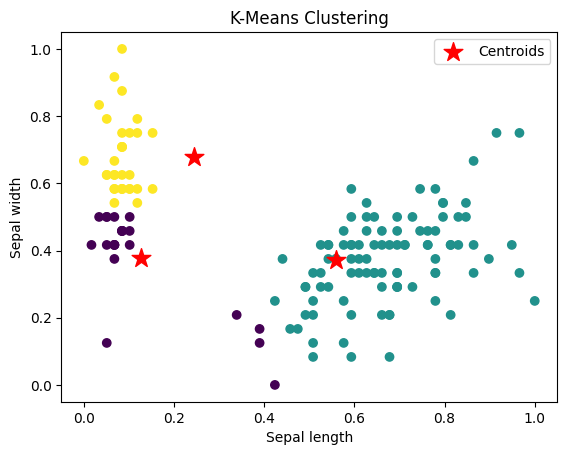

Коэффициент силуэта: 0.7604006451210259


In [40]:
# Визуализация результатов
plt.scatter(scaled_data['petal.length'], scaled_data['sepal.width'], c=scaled_data['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Вычисляет коэффициент силуэта, который измеряет, насколько хорошо объекты сгруппированы в кластеры. 
# Значение находится в диапазоне [-1, 1]. 
# Значения, близкие к 1, указывают на хорошее качество кластеризации.
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Коэффициент силуэта: {silhouette_avg}")